In [4]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import numpy as np

def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder().fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

class MyDummyClassifier(BaseEstimator):
    #fit() method에서는 아무것도 학습하지 않음
    def fit(self,X,y=None):
        pass
    #predict() method에서는 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred
    
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

#Dummy Classifier를 이용해 학습/예측/평가
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print('MyDummyClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))


MyDummyClassifier accuracy: 0.7877


In [10]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        #입력값으로 들어오는 X dataset의 크기 만큼 모두 0값으로 만들어서 반환
        return np.zeros((len(X),1))

digits = load_digits()
#digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환, 7이 아니면 False이고 0으로 반환
#(digits.target==7)로만 하면 bool values를 가지니까 int로 변환
y = (digits.target==7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)

#불균형한 label data 분포도 확인
print('label data set size:',y_test.shape)
print('test set label 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{0:.3f}'.format(accuracy_score(y_test,fakepred)))
    

[False False False ... False False False]
label data set size: (450,)
test set label 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [11]:
#confusion_matrix()를 MyFakeClassifier의 예측 결과에 사용
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

In [14]:
#get_clf_eval로 titanic data logistic regression 분류 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}'.format(accuracy,precision,recall))
    
    
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)


confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
#predict_proba() 수행
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞에 5개 추출: \n', pred_proba[:5])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:5])

pred_proba() shape: (179, 2)
pred_proba array에서 앞에 5개 추출: 
 [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]
 [0.84968519 0.15031481]
 [0.82343411 0.17656589]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]
 [0.84968519 0.15031481 0.        ]
 [0.82343411 0.17656589 0.        ]]


In [16]:
#Binarizer
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

#predict_proba() 반환값의 두 번째 column, 즉 Positive class column 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705


In [17]:
#임계값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4

#predict_proba() 반환값의 두 번째 column, 즉 Positive class column 하나만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

confusion matrix
[[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197


In [19]:
#임곗값은 0.4에서 0.6까지 0.05씩 증가
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_1,threshold):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
confusion matrix
[[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197
임곗값: 0.45
confusion matrix
[[105  13]
 [ 13  48]]
accuracy: 0.8547, precision: 0.7869, recall: 0.7869
임곗값: 0.5
confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705
임곗값: 0.55
confusion matrix
[[111   7]
 [ 16  45]]
accuracy: 0.8715, precision: 0.8654, recall: 0.7377
임곗값: 0.6
confusion matrix
[[113   5]
 [ 17  44]]
accuracy: 0.8771, precision: 0.8980, recall: 0.7213


In [22]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve

#label 값이 1일 때의 예측 확률 추출
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 label 값이 1일 때의 예츨 확률을 precision_recall_curve 인자로 입력
#threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
#일반적으로 0.11~0.95정도의 임곗값을 담은 ndarray 반환
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)

#147건 중 10건만 15 step으로 추출
thr_index = np.arange(0,thresholds.shape[0],15)
print('index 10개:', thr_index)
print('임곗값 10새:', np.round(thresholds[thr_index],2))

#정밀도, 재현율 10개
print('정밀도:', np.round(precisions[thr_index],3))
print('재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (147,)
index 10개: [  0  15  30  45  60  75  90 105 120 135]
임곗값 10새: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


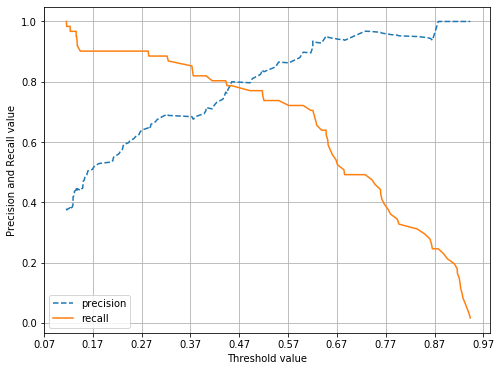

In [25]:
#precision_recall_curve 정밀도와 재현율 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_prob_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 threshold값, y축은 정밀도, 재현율 값으로 plot, 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    #threshold 값 x축 scale을 0.1단위로 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    #x축,y축 label과 legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [26]:
#f1_score()
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print('F1 score:{0:.4f}'.format(f1))


F1 score:0.7966


In [27]:
#get_clf_eval()에 f1_score() 추가, get_eval_by_threshold 사용
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('confusion matrix')
    print(confusion)
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

    

임곗값: 0.4
confusion matrix
[[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197, f1: 0.7576
임곗값: 0.45
confusion matrix
[[105  13]
 [ 13  48]]
accuracy: 0.8547, precision: 0.7869, recall: 0.7869, f1: 0.7869
임곗값: 0.5
confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705, f1: 0.7966
임곗값: 0.55
confusion matrix
[[111   7]
 [ 16  45]]
accuracy: 0.8715, precision: 0.8654, recall: 0.7377, f1: 0.7965
임곗값: 0.6
confusion matrix
[[113   5]
 [ 17  44]]
accuracy: 0.8771, precision: 0.8980, recall: 0.7213, f1: 0.8000


In [30]:
#roc_curve()
from sklearn.metrics import roc_curve

#label 값이 1일 때의 예측 확률 추출
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
#반환된 임계값이 47건임으로 10건만 step5으로 추출
thr_index = np.arange(0,thresholds.shape[0],5)
print('index 10개:', thr_index)
print('임곗값 10개:', np.round(thresholds[thr_index],2))

#FPR, TPR 값
print('FPR:', np.round(fprs[thr_index],3))
print('TPR:', np.round(tprs[thr_index],3))

index 10개: [ 0  5 10 15 20 25 30 35 40 45]
임곗값 10개: [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
FPR: [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
TPR: [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


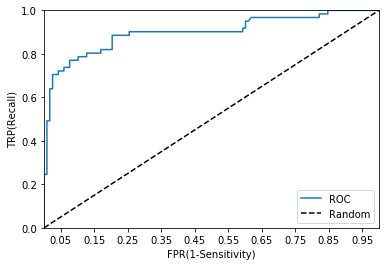

In [31]:
#ROC 곡선 시각화
def roc_curve_plot(y_test,pred_proba_c1):
    #임곗값에 따른 FPR,TPR 값을 반환받음
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    #ROC curve 그림
    plt.plot(fprs,tprs,label='ROC')
    #가운데 직선 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TRP(Recall)')
    plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

In [32]:
#roc_auc_score()
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))


ROC AUC 값:0.8429
